In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
dfs = pd.read_excel('final_prepared.xlsx')


In [3]:
dfs.head()

,Unnamed: 0,AT,V,AP,RH,PE,Temp,Humid,AT_n,V_n,AP_n,RH_n
0,0,14.96,41.76,1024.07,73.17,463.26,1,4,0.372521,0.291815,0.771591,0.638204
1,1,25.18,62.96,1020.04,59.08,444.37,3,3,0.662040,0.669039,0.671863,0.449330
2,2,5.11,39.40,1012.16,92.14,488.56,1,4,0.093484,0.249822,0.476862,0.892493
3,3,20.86,57.32,1010.24,76.64,446.48,2,4,0.539660,0.568683,0.429349,0.684718
4,4,10.82,37.50,1009.23,96.62,473.90,1,4,0.255241,0.216014,0.404355,0.952547


In [4]:
X= dfs[["Temp","Humid","AT_n","V_n","AP_n","RH_n"]].values

In [5]:
y= dfs["PE"].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=7)

In [7]:
print("X train shape: ",X_train.shape)
print("X test  shape: ",X_test.shape)

print("y train shape: ",y_train.shape)
print("y test  shape: ",y_test.shape)

X train shape:  (35883, 6)
X test  shape:  (11961, 6)
y train shape:  (35883,)
y test  shape:  (11961,)


In [8]:
from sklearn.tree import DecisionTreeRegressor

In [9]:
regr= DecisionTreeRegressor(max_depth=2, min_samples_split=5, min_samples_leaf=2)

In [10]:
regr.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [11]:
y_prediction =  regr.predict(X_test)
y_prediction

array([479.28124227, 438.17578995, 465.21358797, ..., 465.21358797,
       438.17578995, 438.17578995])

In [12]:
y_test

array([482.21, 445.33, 474.08, ..., 467.21, 431.79, 442.89])

In [16]:
from sklearn.metrics import r2_score
print("R2 Score:")
r2_score(y_test, y_prediction)

R2 Score:


0.8593733120875664

In [17]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error:")
mean_absolute_error(y_test, y_prediction)

Mean Absolute Error:


5.106282749531314

In [18]:
from sklearn.metrics import mean_squared_error
print("Mean Squared Error:")
mean_squared_error(y_test, y_prediction)

Mean Squared Error:


40.80903395766401

In [19]:
import math

from sklearn.metrics import mean_squared_error
print("Root Mean Squared Error:")
print (math.sqrt(mean_squared_error(y_test, y_prediction)))

Root Mean Squared Error:
6.388194890394627


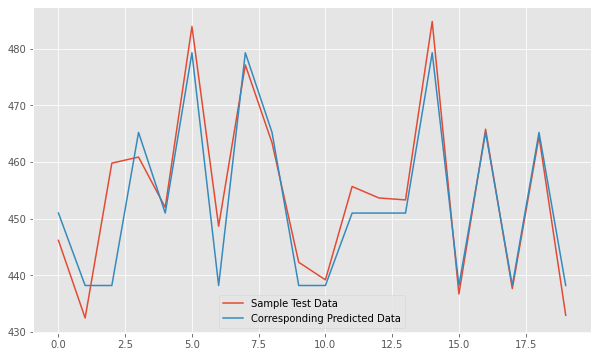

In [20]:
#the dalues from the data
plt.style.use('ggplot')
plt.rcParams['text.color'] = 'black'
plt.figure(figsize=(10, 6))
plt.plot(y_test[500:520], label = "Sample Test Data")
plt.plot(y_prediction[500:520], label = "Corresponding Predicted Data")
plt.legend()

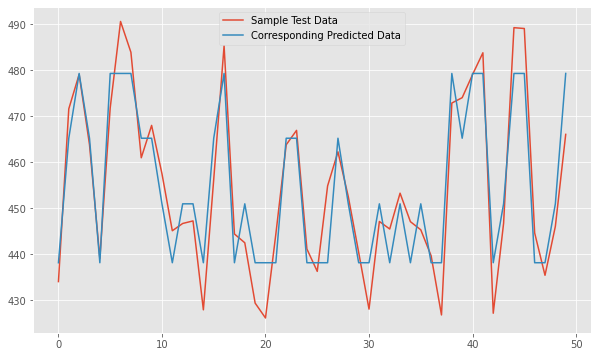

In [22]:
#the dalues from the data
plt.style.use('ggplot')
plt.rcParams['text.color'] = 'black'
plt.figure(figsize=(10, 6))
plt.plot(y_test[1050:1100], label = "Sample Test Data")
plt.plot(y_prediction[1050:1100], label = "Corresponding Predicted Data")
plt.legend()